In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocess transactional data

Going to drop any personal account-to-personal account transactions and just keep the business payments

In [2]:
bank_max = pd.read_csv('mapped_df.csv')

In [3]:
# Convert not_happened_yet_date to datetime with dayfirst=True
bank_max['not_happened_yet_date'] = pd.to_datetime(bank_max['not_happened_yet_date'], dayfirst=True)

In [7]:
bank_max.head()

num_trans = len(bank_max)
print(num_trans)

10148280


In [10]:
# calculate average number of transactions per day
# Assuming 'timestamp' is the column with your timestamps and 'df' is your DataFrame
#bank_man['date'] = df['timestamp'].dt.date  # Convert timestamps to dates

# Count the number of transactions per day
transactions_per_day = bank_max.groupby('not_happened_yet_date').size()

# Calculate the average number of transactions per day
average_transactions_per_day = transactions_per_day.mean()

print(average_transactions_per_day)

27879.89010989011


In [11]:
# calculte proportion of transactions in one day as a

print(average_transactions_per_day*100/num_trans)

0.27472527472527475


In [4]:
# drop row with NaN in 'group' column - remove C2C transactions
# Only store C2B transactions
bank = bank_max.dropna(subset=['group'])

bank.head()

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,group
0,10371.0,4.00,CINEMA,01/01/2025,Cinema
1,88339.0,2.40,40544,01/01/2025,Personal Accounts
2,18555.0,2.40,85149,01/01/2025,Personal Accounts
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,01/01/2025,Cafe
4,80792.0,1.95,18555,01/01/2025,Personal Accounts


In [5]:
# filter for dataframe with 'from_totally_fake_account' == 10371
bank_id= bank[bank['from_totally_fake_account'] == 10371.0]

# drop 'to_randomly_generated_account' column
bank_id = bank_id.drop(columns=['to_randomly_generated_account','not_happened_yet_date'])

bank_id.head(7)

,from_totally_fake_account,monopoly_money_amount,group
0,10371.0,4.00,Cinema
8107,10371.0,1.45,Cafe
8109,10371.0,2.55,Cafe
8118,10371.0,2.65,Cafe
18537,10371.0,8.99,Streaming Service
29117,10371.0,2.20,Cafe
29120,10371.0,2.65,Cafe


In [6]:
print(bank_id.index)

Index([       0,     8107,     8109,     8118,    18537,    29117,    29120,
          59058,    59059,    59060,
       ...
       10040652, 10087270, 10103854, 10103856, 10103857, 10121181, 10139127,
       10139128, 10139141, 10139159],
      dtype='int64', length=1653)


## Pivot to compute average spend per category - for a single account number

In [7]:
bank_id_pivoted = bank_id.pivot_table(index='from_totally_fake_account',
                                columns='group',
                                values='monopoly_money_amount',
                                aggfunc='mean')

bank_id_pivoted.head(20)

group,Alcohol Store,Bar,Cafe,Cinema,Fast Food,Gaming,Home,Personal Accounts,Pets,Pub,Restaurant/Takeaway,Roasterie/Tea Shop,Streaming Service,Supermarket
from_totally_fake_account,,,,,,,,,,,,,,
10371.0,16.995,12.316062,2.413517,6.451613,3.928571,43.0,47.0,28.799837,20.25,13.87063,30.227917,22.0425,8.99,96.84942


## Pivot for every account number

In [8]:
# total transactions made by an account in each merchant category
bank_category_pivoted = bank.pivot_table(index='from_totally_fake_account',
                                columns='group',
                                values='monopoly_money_amount',
                                aggfunc='sum')

bank_category_pivoted.shape

(8142, 27)

- Dataframe has the correct number of rows for each person.

In [9]:
bank_category_pivoted.head(10)

group,Accessory Shop,Alcohol Store,Bar,Book Store,Butcher,Cafe,Children's Shop,Cinema,Clothing Store,Cook Shop,...,Personal Accounts,Pets,Pub,Restaurant/Takeaway,Roasterie/Tea Shop,Sports Store,Streaming Service,Supermarket,Tech Store,Turkey Farm
from_totally_fake_account,,,,,,,,,,,,,,,,,,,,,
1000.0,NaN,114.98,3081.0,8.0,NaN,1955.20,160.0,252.0,145.0,NaN,...,18213.05,529.0,1530.90,1613.39,68.18,NaN,107.88,681.93,NaN,NaN
1002.0,NaN,154.97,2511.5,NaN,NaN,483.75,268.0,309.0,NaN,NaN,...,6467.30,NaN,1947.97,1503.67,61.82,175.0,107.88,1045.61,NaN,NaN
1006.0,NaN,107.95,2237.5,412.0,1484.98,2075.95,1480.0,227.0,65.0,149.0,...,4062.70,NaN,1946.80,1576.16,31.36,NaN,107.88,931.20,NaN,NaN
1018.0,NaN,39.99,1691.5,20.0,1016.00,32.60,59.0,28.0,2009.0,NaN,...,4307.70,30.0,832.00,1771.22,52.73,84.0,NaN,1288.22,NaN,NaN
1053.0,NaN,179.97,2402.0,NaN,18.00,725.85,133.0,222.0,2561.0,NaN,...,6305.35,NaN,1473.21,1731.32,127.27,115.0,107.88,1119.22,79.0,NaN
1059.0,NaN,10.00,2046.0,480.0,NaN,440.25,1726.0,4.0,128.0,NaN,...,6781.86,NaN,2205.98,1506.28,204.09,206.0,NaN,1085.49,NaN,NaN
1071.0,NaN,184.95,1747.0,35.0,30.00,499.65,13.0,223.0,NaN,23.0,...,4140.85,NaN,1550.79,1374.50,66.36,889.0,107.88,1200.44,471.0,NaN
1078.0,NaN,33.99,2136.5,NaN,207.00,592.25,1390.0,274.0,NaN,120.0,...,1325.35,NaN,1290.44,1402.88,39.09,161.0,107.88,5526.39,NaN,NaN
1086.0,NaN,283.95,1963.0,25.0,1222.00,506.40,1145.0,256.0,1749.0,NaN,...,4782.41,60.0,1841.72,1741.44,114.10,117.0,107.88,1125.94,NaN,NaN


- Can see NaNs where people haven't spent money.
- Replace these values with £0.

In [11]:
# replace NaN with 0
bank_category_pivoted_final = bank_category_pivoted#.fillna(0)


# drop Personal Accounts column
bank_category_pivoted_final = bank_category_pivoted_final.drop(columns=['Personal Accounts'])

bank_category_pivoted_final.head(10)

group,Accessory Shop,Alcohol Store,Bar,Book Store,Butcher,Cafe,Children's Shop,Cinema,Clothing Store,Cook Shop,...,Home,Pets,Pub,Restaurant/Takeaway,Roasterie/Tea Shop,Sports Store,Streaming Service,Supermarket,Tech Store,Turkey Farm
from_totally_fake_account,,,,,,,,,,,,,,,,,,,,,
1000.0,NaN,114.98,3081.0,8.0,NaN,1955.20,160.0,252.0,145.0,NaN,...,93.0,529.0,1530.90,1613.39,68.18,NaN,107.88,681.93,NaN,NaN
1002.0,NaN,154.97,2511.5,NaN,NaN,483.75,268.0,309.0,NaN,NaN,...,NaN,NaN,1947.97,1503.67,61.82,175.0,107.88,1045.61,NaN,NaN
1006.0,NaN,107.95,2237.5,412.0,1484.98,2075.95,1480.0,227.0,65.0,149.0,...,44.0,NaN,1946.80,1576.16,31.36,NaN,107.88,931.20,NaN,NaN
1018.0,NaN,39.99,1691.5,20.0,1016.00,32.60,59.0,28.0,2009.0,NaN,...,71.0,30.0,832.00,1771.22,52.73,84.0,NaN,1288.22,NaN,NaN
1053.0,NaN,179.97,2402.0,NaN,18.00,725.85,133.0,222.0,2561.0,NaN,...,467.0,NaN,1473.21,1731.32,127.27,115.0,107.88,1119.22,79.0,NaN
1059.0,NaN,10.00,2046.0,480.0,NaN,440.25,1726.0,4.0,128.0,NaN,...,NaN,NaN,2205.98,1506.28,204.09,206.0,NaN,1085.49,NaN,NaN
1071.0,NaN,184.95,1747.0,35.0,30.00,499.65,13.0,223.0,NaN,23.0,...,NaN,NaN,1550.79,1374.50,66.36,889.0,107.88,1200.44,471.0,NaN
1078.0,NaN,33.99,2136.5,NaN,207.00,592.25,1390.0,274.0,NaN,120.0,...,NaN,NaN,1290.44,1402.88,39.09,161.0,107.88,5526.39,NaN,NaN
1086.0,NaN,283.95,1963.0,25.0,1222.00,506.40,1145.0,256.0,1749.0,NaN,...,621.0,60.0,1841.72,1741.44,114.10,117.0,107.88,1125.94,NaN,NaN


In [12]:
# normalise columns to reflect percentage of total transactions in each category
bank_category_pivoted_final = bank_category_pivoted_final.div(bank_category_pivoted_final.sum(axis=0), axis=1)
bank_category_pivoted_final.head(10)

group,Accessory Shop,Alcohol Store,Bar,Book Store,Butcher,Cafe,Children's Shop,Cinema,Clothing Store,Cook Shop,...,Home,Pets,Pub,Restaurant/Takeaway,Roasterie/Tea Shop,Sports Store,Streaming Service,Supermarket,Tech Store,Turkey Farm
from_totally_fake_account,,,,,,,,,,,,,,,,,,,,,
1000.0,NaN,0.000165,0.000147,0.000005,NaN,0.000289,0.000035,0.000291,0.000026,NaN,...,0.000154,0.001427,0.000120,0.000125,0.000071,NaN,0.000304,0.000030,NaN,NaN
1002.0,NaN,0.000222,0.000119,NaN,NaN,0.000072,0.000059,0.000357,NaN,NaN,...,NaN,NaN,0.000153,0.000117,0.000065,0.000151,0.000304,0.000046,NaN,NaN
1006.0,NaN,0.000155,0.000106,0.000272,0.000621,0.000307,0.000325,0.000262,0.000011,0.000596,...,0.000073,NaN,0.000153,0.000122,0.000033,NaN,0.000304,0.000041,NaN,NaN
1018.0,NaN,0.000057,0.000080,0.000013,0.000425,0.000005,0.000013,0.000032,0.000354,NaN,...,0.000117,0.000081,0.000065,0.000138,0.000055,0.000072,NaN,0.000057,NaN,NaN
1053.0,NaN,0.000258,0.000114,NaN,0.000008,0.000107,0.000029,0.000256,0.000451,NaN,...,0.000771,NaN,0.000115,0.000134,0.000133,0.000099,0.000304,0.000049,0.000102,NaN
1059.0,NaN,0.000014,0.000097,0.000317,NaN,0.000065,0.000379,0.000005,0.000023,NaN,...,NaN,NaN,0.000173,0.000117,0.000213,0.000178,NaN,0.000048,NaN,NaN
1071.0,NaN,0.000265,0.000083,0.000023,0.000013,0.000074,0.000003,0.000257,NaN,0.000092,...,NaN,NaN,0.000121,0.000107,0.000069,0.000766,0.000304,0.000053,0.000606,NaN
1078.0,NaN,0.000049,0.000102,NaN,0.000087,0.000088,0.000306,0.000316,NaN,0.000480,...,NaN,NaN,0.000101,0.000109,0.000041,0.000139,0.000304,0.000244,NaN,NaN
1086.0,NaN,0.000407,0.000093,0.000017,0.000511,0.000075,0.000252,0.000295,0.000308,NaN,...,0.001025,0.000162,0.000144,0.000135,0.000119,0.000101,0.000304,0.000050,NaN,NaN


In [16]:
# Print the percentage of NaN values in each column and srt by ascending order
nan_percentage = bank_category_pivoted_final.isnull().mean().sort_values(ascending=False)
print(nan_percentage)

group
Flower Shop            0.974945
Accessory Shop         0.955048
Gym                    0.898796
Turkey Farm            0.795505
Tech Store             0.788013
Pets                   0.624417
Sports Store           0.621960
Home                   0.609310
Cook Shop              0.605257
Streaming Service      0.596291
Greengrocer            0.467944
Department Store       0.449153
Butcher                0.419799
Clothing Store         0.301769
Gaming                 0.225375
Children's Shop        0.212724
Book Store             0.187669
Cinema                 0.117907
Alcohol Store          0.066077
Roasterie/Tea Shop     0.030828
Fast Food              0.000491
Cafe                   0.000000
Pub                    0.000000
Restaurant/Takeaway    0.000000
Supermarket            0.000000
Bar                    0.000000
dtype: float64


## UMAP + HDBSCAN - Average spend per category features

In [12]:
import umap

In [220]:
# set random seed
#np.random.seed(120)

# convert to numpy array
bank_avg_spend_umap = bank_category_pivoted_final.to_numpy()
print(f'Shape of average spend dataset',bank_avg_spend_umap.shape)

# apply UMAP
umap_reducer = umap.UMAP(
    n_neighbors=25, #25
    min_dist=0.1, # 0.15
    metric = 'euclidean',
    n_components=2,
    random_state=168 #168
)
embedding = umap_reducer.fit_transform(bank_avg_spend_umap)

Shape of average spend dataset (8142, 26)


c:\Users\donjo\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


C:\Users\donjo\AppData\Local\Temp\ipykernel_33176\3656434986.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


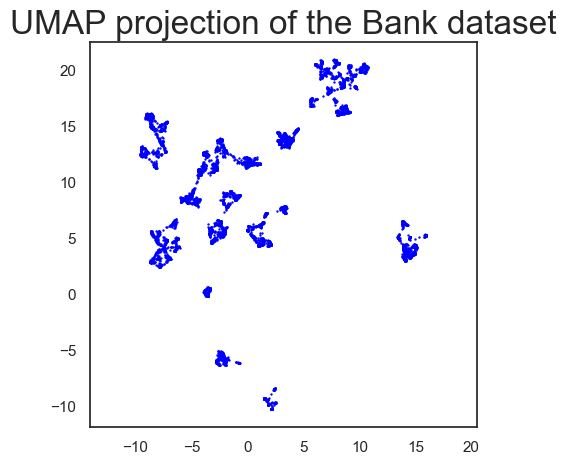

In [221]:
# plot UMAP
plt.figure(figsize=(5, 5))
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c='blue',
    cmap='Spectral',
    s=0.5
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Bank dataset', fontsize=24);


In [311]:


# get HDBSCAN from sklearn
from sklearn.cluster import HDBSCAN
hdb = HDBSCAN(
    min_samples=1,
    min_cluster_size=350
)

# fit HDBSCAN
hdb_clusters = hdb.fit_predict(embedding)

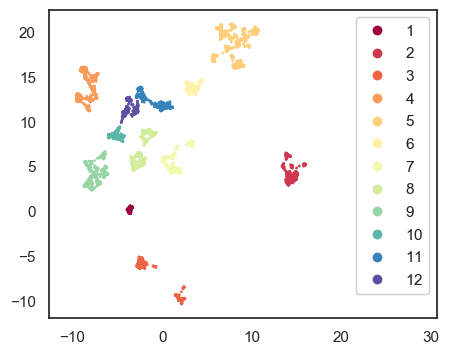

Silhouette score for clusters:  0.61515343


In [370]:
plt.figure(figsize=(5, 4))
sns.set_theme(style='white')

# add 1 to all clusters to avoid negative cluster numbers
hdb_clusters_legend = hdb_clusters + 2

scatter = plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=hdb_clusters_legend,
    cmap='Spectral',
    s=1,
)
plt.gca().set_aspect('equal', 'datalim')

# Add legend
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="upper right", bbox_to_anchor=(1,1))

# set xlim and ylim
plt.xlim(-2, 20)

plt.gca().add_artist(legend1)

# export to pdf
plt.savefig('HDBSCAN_clusters.pdf', format='pdf', bbox_inches='tight')

# decrease marker size
plt.show()

# get silhouette score
from sklearn.metrics import silhouette_score
print(f'Silhouette score for clusters: ',silhouette_score(embedding, hdb_clusters))

In [313]:
""" # range of min_cluster_size
min_cluster_size = [100, 150, 200, 250, 300, 350, 400, 450, 500]

# set min_samples 
min_samples = 1

# import davies_bouldin_score
from sklearn.metrics import davies_bouldin_score

# empty list to store silhouette scores
silhouette_scores = []
total_cluster_prob = []
davies_bouldin_scores = []
# loop through min_cluster_size

for size in min_cluster_size:
    hdb = HDBSCAN(
        min_samples=min_samples,
        min_cluster_size=size,
    )
    hdb_clusters = hdb.fit_predict(embedding)
    silhouette_scores.append(silhouette_score(embedding, hdb_clusters))
    
    # store total cluster probabalities
    #total_cluster_prob.append(np.sum(hdb.probabilities_))
    
    # store davies bouldin score
    #davies_bouldin_scores.append(davies_bouldin_score(embedding, hdb_clusters))
    

print(f'Silhouette scores: ',silhouette_scores) 

# plot silhouette scores
sns.set_style('whitegrid')
plt.figure(figsize=(7, 3.5))
plt.plot(min_cluster_size, silhouette_scores, marker='o')
plt.xlabel('min_cluster_size',fontsize=16)
plt.ylabel('Silhouette Score',fontsize=16)

# ticks fontsize
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
# save plot
plt.savefig('Silhouette_scores_hdbscan.pdf', format='pdf')
plt.show()  """


" # range of min_cluster_size\nmin_cluster_size = [100, 150, 200, 250, 300, 350, 400, 450, 500]\n\n# set min_samples \nmin_samples = 1\n\n# import davies_bouldin_score\nfrom sklearn.metrics import davies_bouldin_score\n\n# empty list to store silhouette scores\nsilhouette_scores = []\ntotal_cluster_prob = []\ndavies_bouldin_scores = []\n# loop through min_cluster_size\n\nfor size in min_cluster_size:\n    hdb = HDBSCAN(\n        min_samples=min_samples,\n        min_cluster_size=size,\n    )\n    hdb_clusters = hdb.fit_predict(embedding)\n    silhouette_scores.append(silhouette_score(embedding, hdb_clusters))\n    \n    # store total cluster probabalities\n    #total_cluster_prob.append(np.sum(hdb.probabilities_))\n    \n    # store davies bouldin score\n    #davies_bouldin_scores.append(davies_bouldin_score(embedding, hdb_clusters))\n    \n\nprint(f'Silhouette scores: ',silhouette_scores) \n\n# plot silhouette scores\nsns.set_style('whitegrid')\nplt.figure(figsize=(7, 3.5))\nplt.plot(

### Analysis of Clusters based on merchants

In [314]:
# create separate dataframe for cluster labels
cluster_analysis = bank_category_pivoted_final.copy()

# add cluster labels to dataframe
cluster_analysis['cluster'] = hdb_clusters

In [315]:
# plot cluster averages
cluster_averages = cluster_analysis.groupby('cluster').mean()
cluster_averages = cluster_averages.T

""" plt.figure(figsize=(20, 10))
plt.plot(cluster_averages)
plt.legend(cluster_averages.columns)
plt.title('Cluster averages of per-category average spend features', fontsize=14)
plt.xticks(rotation=45)
plt.show() """

" plt.figure(figsize=(20, 10))\nplt.plot(cluster_averages)\nplt.legend(cluster_averages.columns)\nplt.title('Cluster averages of per-category average spend features', fontsize=14)\nplt.xticks(rotation=45)\nplt.show() "

In [316]:
print(len(cluster_averages.columns))

12


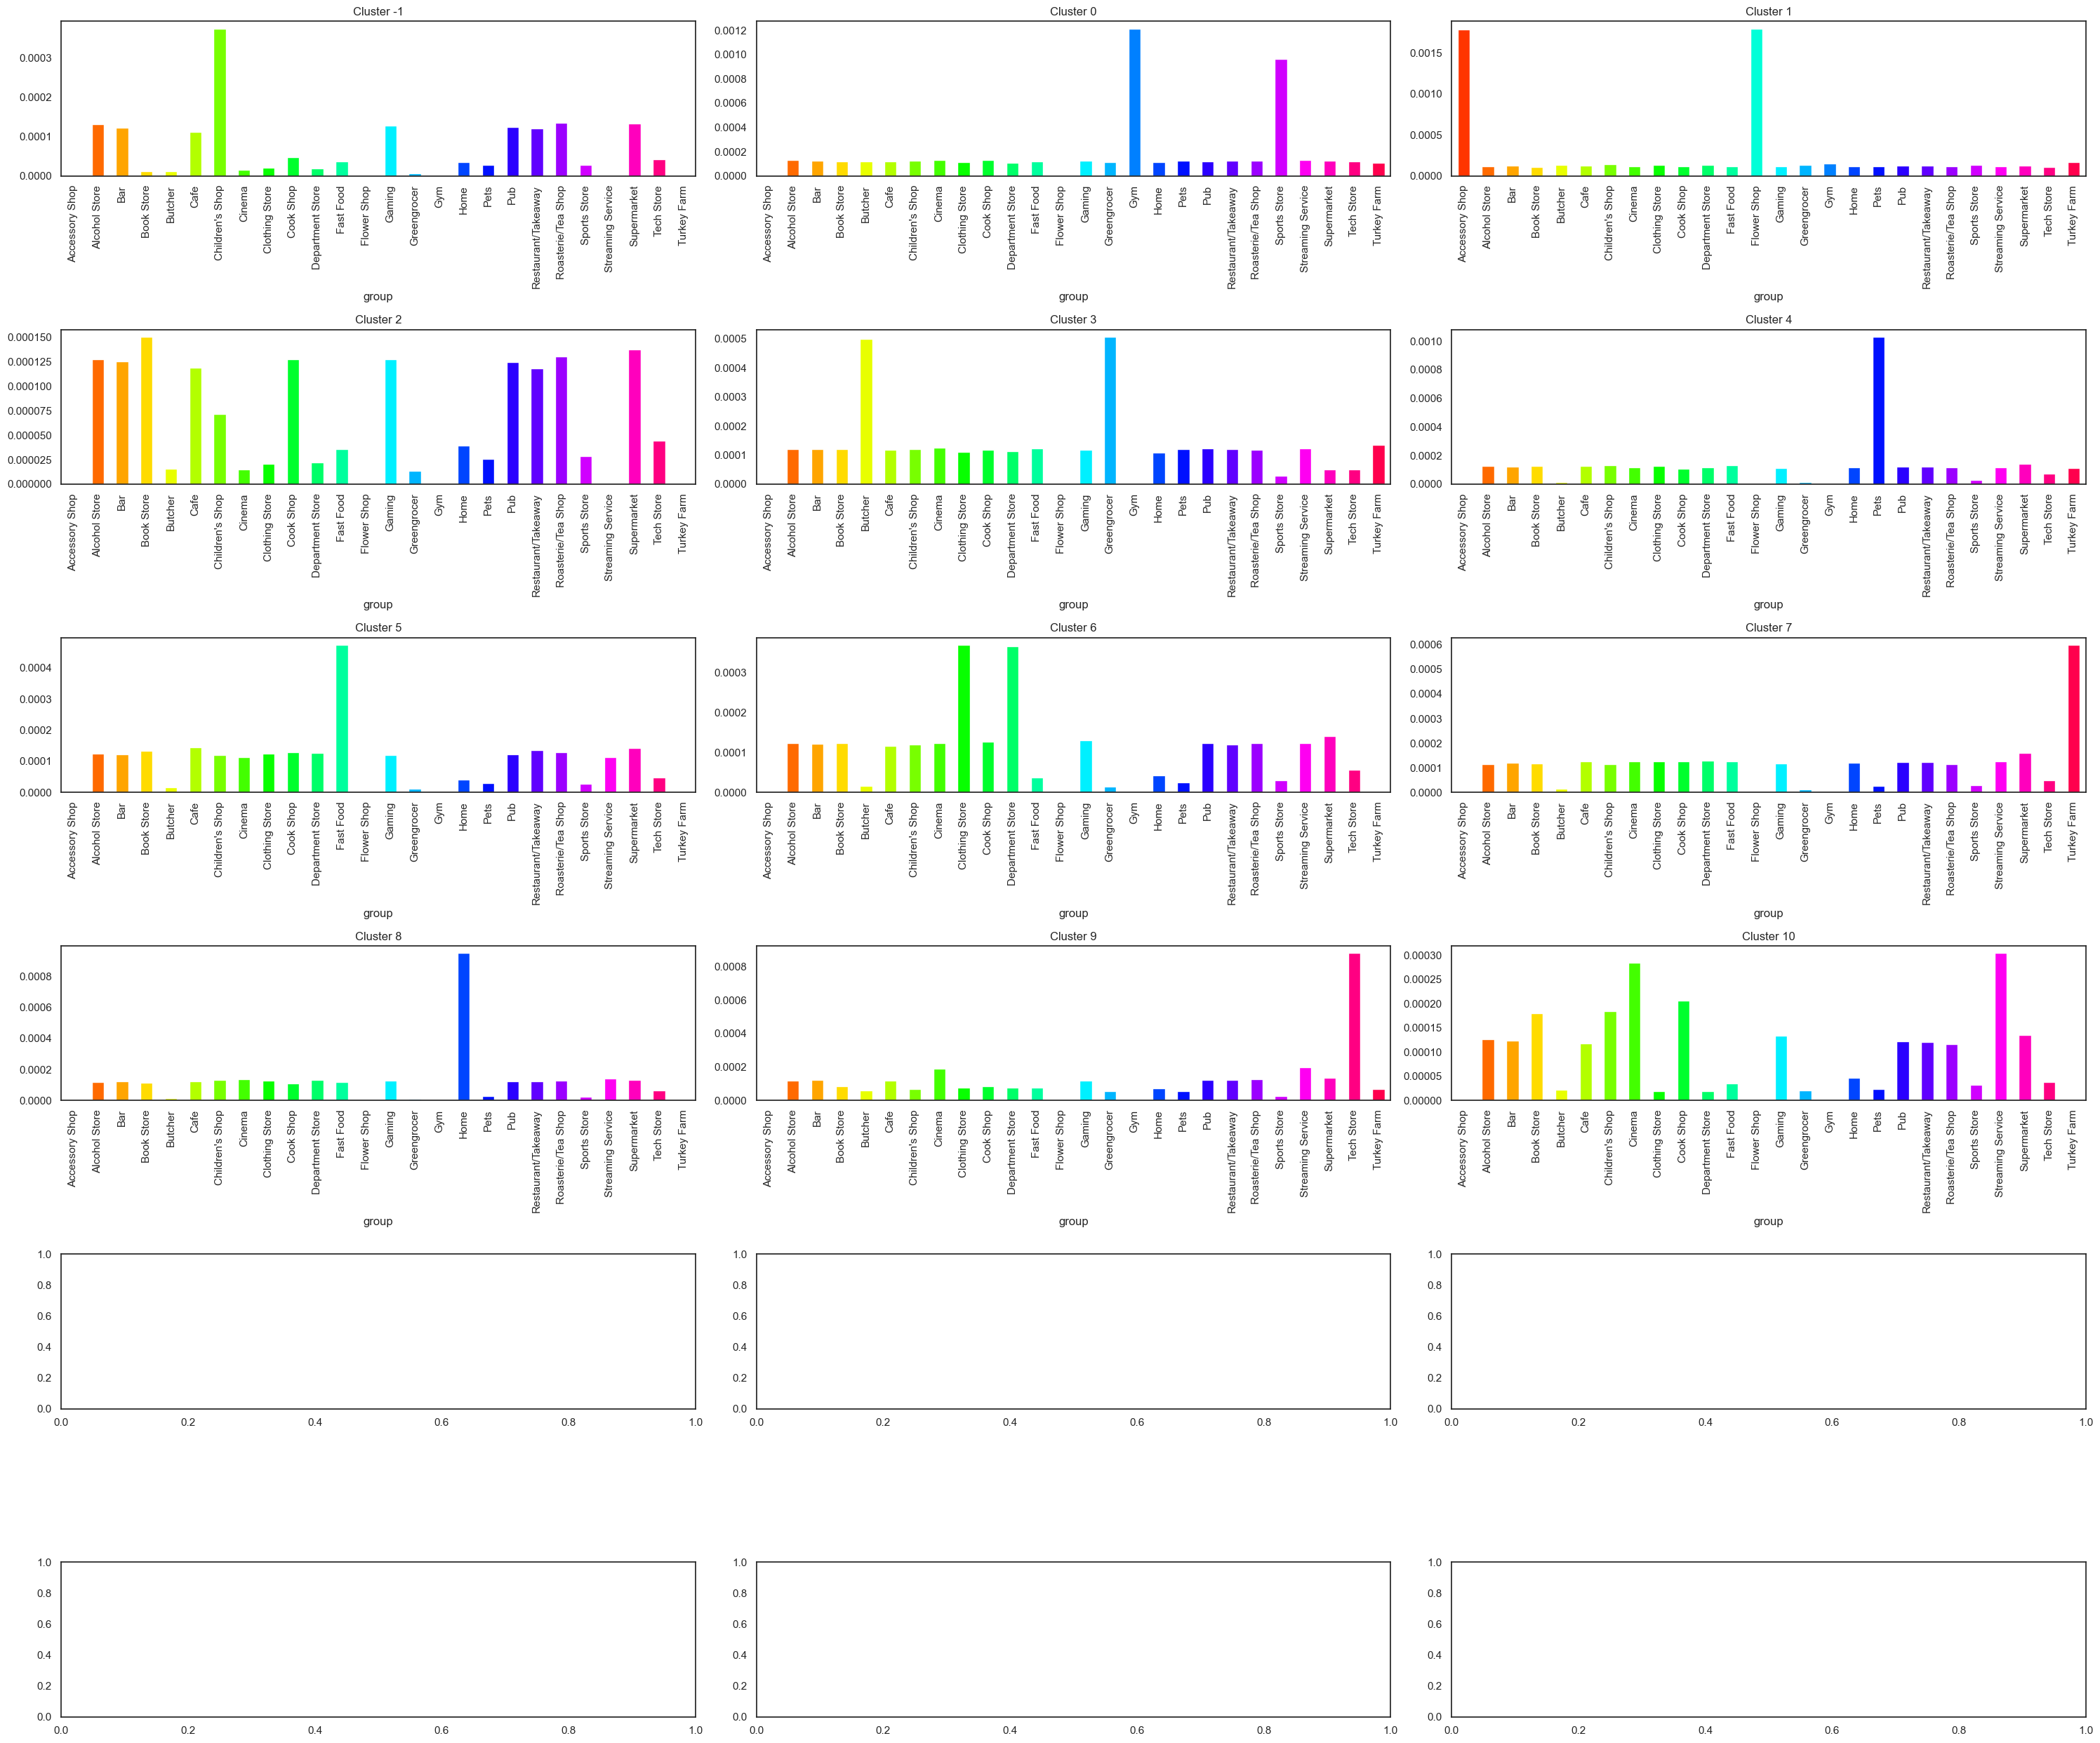

In [317]:
# bar plot of cluster averages subplots for each cluster - 6 clusters
fig, axs = plt.subplots(6, 3, figsize=(30, 25))

sns.set_theme(style='white')

for i in range(len(cluster_averages.columns)):  # Change this line
    ax = axs[i//3, i%3]
    # Generate a color palette for each bar in the subplot
    colors = sns.color_palette('hsv', len(cluster_averages.iloc[:, i]))   
    cluster_averages.iloc[:, i].plot(kind='bar', ax=ax, color = colors)
    ax.set_title(f'Cluster {i-1}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
plt.tight_layout()
plt.show()

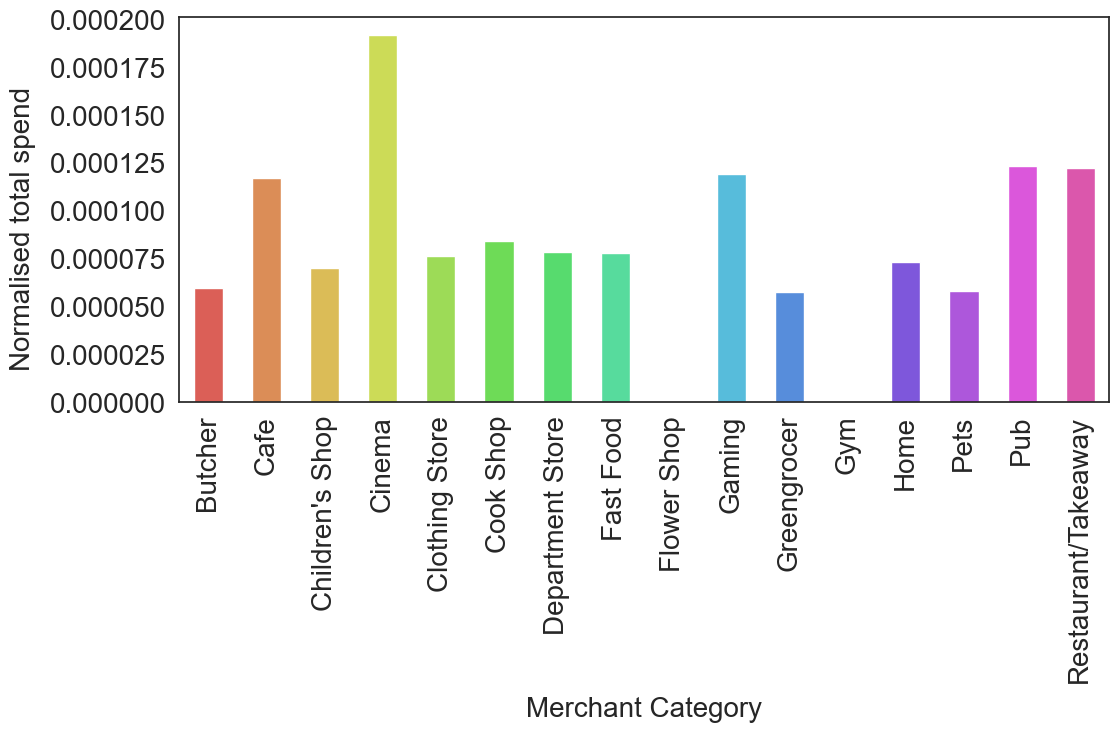

In [338]:
######### For report figures
sns.set_theme(style='white')

# use less saturated dark colours

colors_new = sns.color_palette('hls', len(cluster_averages.columns)+5)

plt.figure(figsize=(12, 5))
cluster_averages.iloc[4:20, 10].plot(kind='bar', color = colors_new)
#plt.title('Cluster 5')
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Merchant Category', fontsize=20, labelpad=10)
ax = plt.gca()  # Get the current axes
ax.set_ylabel('Normalised total spend', fontsize=20, labelpad=10, y=0.45)  # Center the y-label#plt.tight_layout()
plt.savefig('cluster_redundant_1.pdf', format='pdf', bbox_inches='tight')

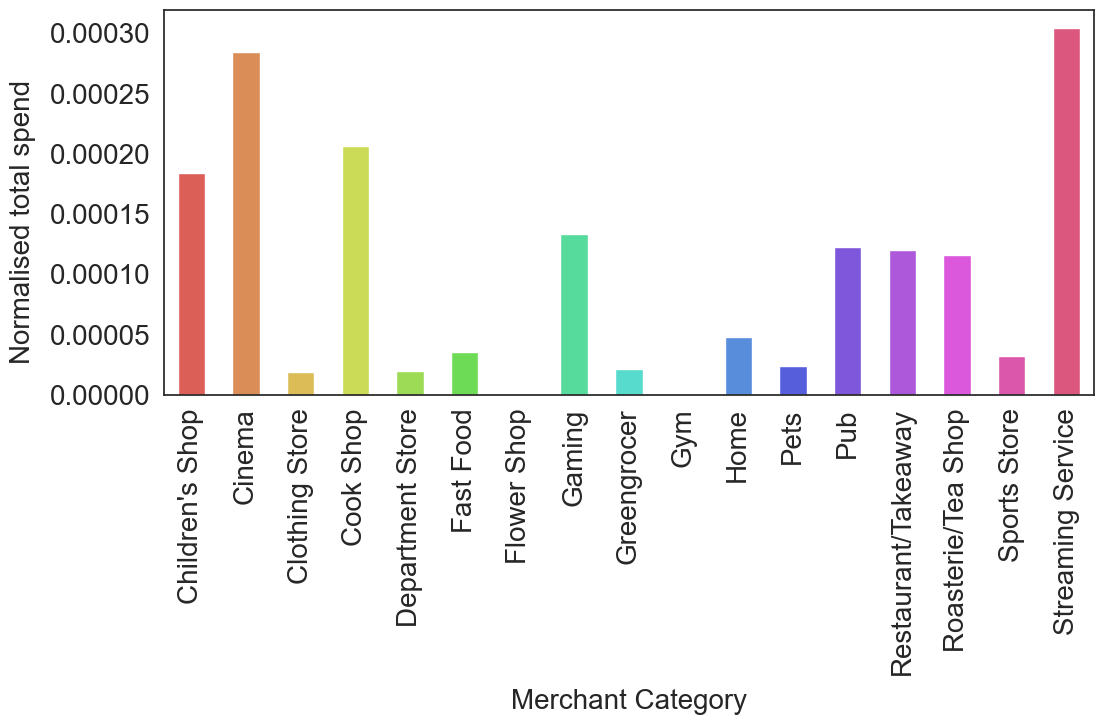

In [343]:
######### For report figures
sns.set_theme(style='white')

colors_new = sns.color_palette('hls', len(cluster_averages.columns)+5)

plt.figure(figsize=(12, 5))
cluster_averages.iloc[6:23, 11].plot(kind='bar', color = colors_new)

plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)

ax = plt.gca()  # Get the current axes
ax.set_ylabel('Normalised total spend', fontsize=20, labelpad=10, y=0.45)  # Center the y-label

plt.xlabel('Merchant Category', fontsize=20, labelpad=10)

plt.savefig('cluster_redundant_2.pdf', format='pdf', bbox_inches='tight')

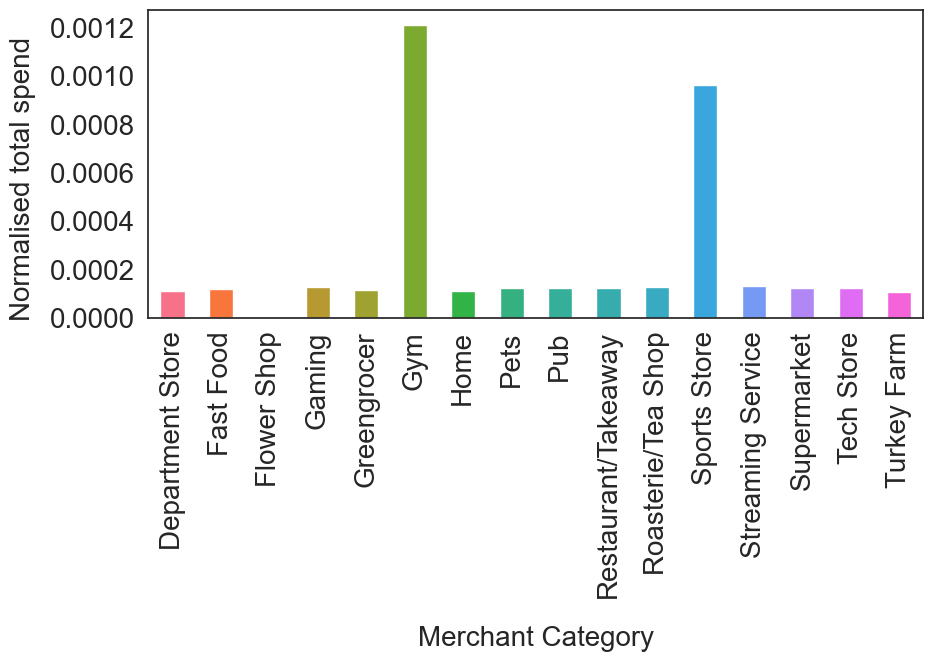

In [346]:
######### For report figures
sns.set_theme(style='white')

# use less saturated dark colours

colors_new = sns.color_palette('husl', len(cluster_averages.columns)+5)

plt.figure(figsize=(10, 4))
cluster_averages.iloc[10:26, 1].plot(kind='bar', color = colors_new)
#plt.title('Cluster 5')
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Merchant Category', fontsize=20, labelpad=20)
ax = plt.gca()  # Get the current axes
ax.set_ylabel('Normalised total spend', fontsize=20, labelpad=10, y=0.45)  # Center the y-label


#plt.tight_layout()
plt.savefig('cluster_gym.pdf', format='pdf', bbox_inches='tight')

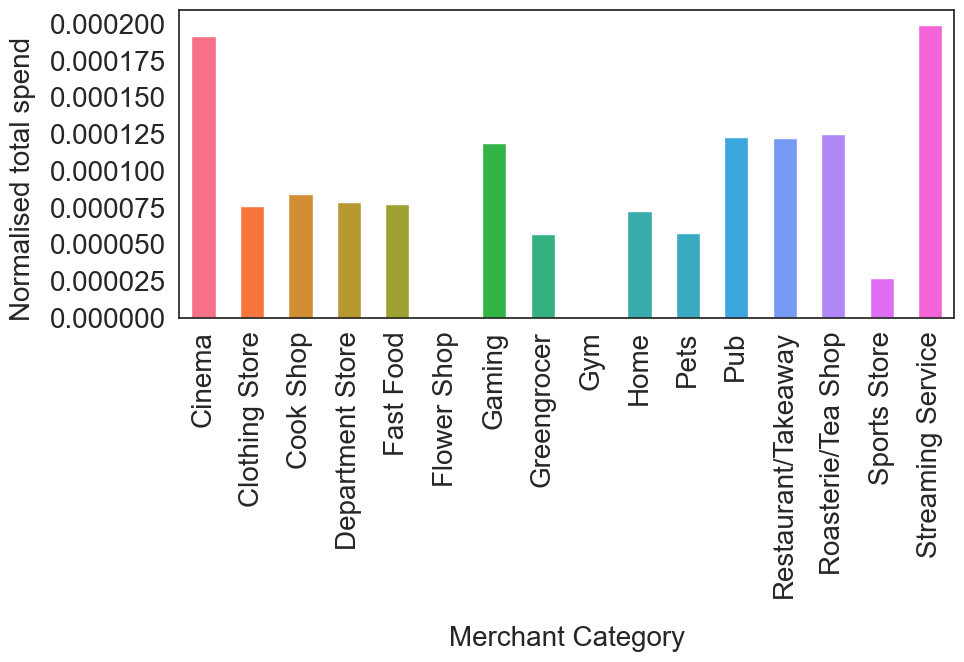

In [348]:
# plt cluster == 4 bar plot
plt.figure(figsize=(10, 4))
cluster_averages.iloc[7:23, 10].plot(kind='bar', color = colors_new)
#plt.title('Cluster 5')
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Merchant Category', fontsize=20, labelpad=20)
ax = plt.gca()  # Get the current axes
ax.set_ylabel('Normalised total spend', fontsize=20, labelpad=10, y=0.45)  # Center the y-label#plt.tight_layout()
plt.savefig('cluster_media_cinema.pdf', format='pdf', bbox_inches='tight')

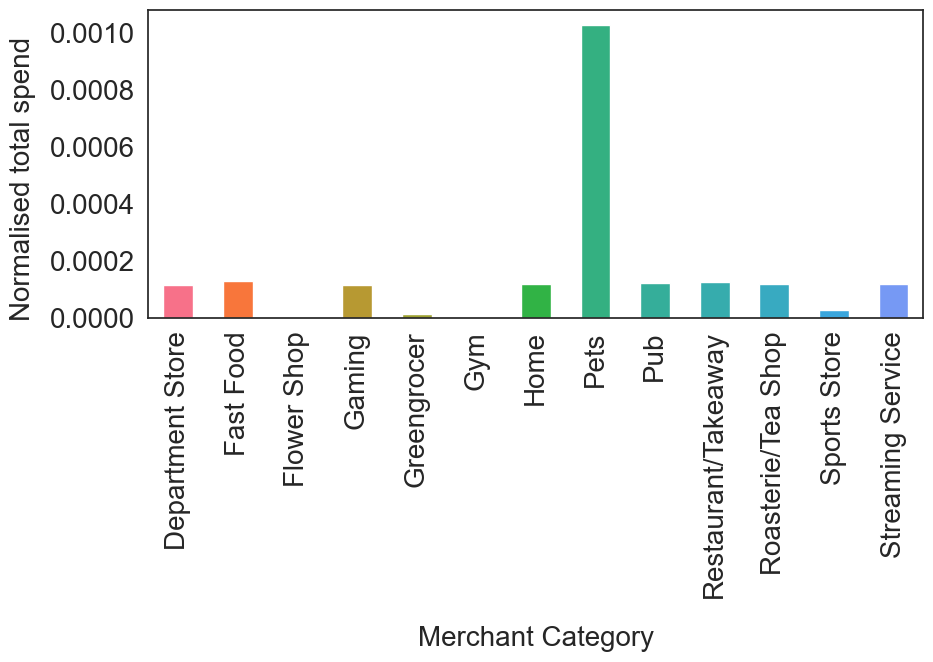

In [360]:

plt.figure(figsize=(10, 4))
cluster_averages.iloc[10:23, 5].plot(kind='bar', color = colors_new)
#plt.title('Cluster 5')
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Merchant Category', fontsize=20, labelpad=20)
ax = plt.gca()  # Get the current axes
ax.set_ylabel('Normalised total spend', fontsize=20, labelpad=10, y=0.45)  # Center the y-label#plt.tight_layout()
plt.savefig('cluster_pets.pdf', format='pdf', bbox_inches='tight')

- Some clusters have high spend gym, sports shops.
- Some have high in greengrocers and butchers and turkey farms.
- Some have high in pet stores.
- High in fast food, cinema, streaming service -- younger people.
- High in flower shop and accessory shops.
- Particularly high across the board - especially in children's shop, supermarket, 

In [323]:
# get counts within each cluster
cluster_counts = cluster_analysis.groupby('cluster').size()
cluster_counts

cluster
-1      184
 0      756
 1      558
 2      911
 3     1458
 4      503
 5      655
 6      807
 7      885
 8      374
 9      601
 10     450
dtype: int64

## Predictive model - XGBoost/LR

#### Train, test split

In [381]:
# import train_test_split
from sklearn.model_selection import train_test_split

# drop cluster == 2 as it is redundant
cluster_analysis_final = cluster_analysis[cluster_analysis['cluster'] != 2]

# any label more than 1, subtract 1
cluster_analysis_final['cluster'] = cluster_analysis_final['cluster'].apply(lambda x: x-1 if x>1 else x)


y = cluster_analysis_final['cluster'] + 1  # Add 1 to all labels to avoid negative labels

X = cluster_analysis_final.drop(columns='cluster')  # Use cluster_analysis_final instead of cluster_analysis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

C:\Users\donjo\AppData\Local\Temp\ipykernel_33176\502389595.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_analysis_final['cluster'] = cluster_analysis_final['cluster'].apply(lambda x: x-1 if x>1 else x)


#### Dummy Classifier

In [382]:

# test dummy classifier
from sklearn.dummy import DummyClassifier

# create dummy classifier
dummy = DummyClassifier(strategy='most_frequent')

# fit dummy classifier
dummy.fit(X_train, y_train)

# test dummy classifier
y_pred = dummy.predict(X_test)

# get classification report
from sklearn.metrics import classification_report

# get classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.00      0.00      0.00       227
           2       0.00      0.00      0.00       167
           3       0.20      1.00      0.34       438
           4       0.00      0.00      0.00       151
           5       0.00      0.00      0.00       197
           6       0.00      0.00      0.00       242
           7       0.00      0.00      0.00       266
           8       0.00      0.00      0.00       112
           9       0.00      0.00      0.00       180
          10       0.00      0.00      0.00       135

    accuracy                           0.20      2170
   macro avg       0.02      0.09      0.03      2170
weighted avg       0.04      0.20      0.07      2170



c:\Users\donjo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\donjo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\donjo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

#### XGBoost

In [383]:
#import xgboost
import xgboost as xgb

# grid search for best parameters for XGBoost
from sklearn.model_selection import GridSearchCV

# create XGBoost model
xgboost = xgb.XGBClassifier()


# create parameter grid

param_grid = {
    'max_depth': [2,5,10,20,50],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'n_estimators': [200,600,1000]
}

# create GridSearchCV object
grid_search_xgb = GridSearchCV(estimator=xgboost, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)

# fit GridSearchCV object
grid_search_xgb.fit(X_train, y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
                         'max_depth': [2, 5, 10, 20, 50],
                         'n_estimators': [200, 600, 1000]},
             verbose=2)

In [384]:
#print best parameters
print(grid_search_xgb.best_params_)

# get best estimator
best_xgb = grid_search_xgb.best_estimator_


# test best estimator
y_pred = best_xgb.predict(X_test)

# get classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 600}
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       1.00      1.00      1.00       227
           2       0.99      0.99      0.99       167
           3       1.00      1.00      1.00       438
           4       0.99      0.99      0.99       151
           5       0.99      0.99      0.99       197
           6       1.00      1.00      1.00       242
           7       1.00      1.00      1.00       266
           8       0.97      0.98      0.98       112
           9       0.98      0.97      0.97       180
          10       0.97      0.99      0.98       135

    accuracy                           0.99      2170
   macro avg       0.99      0.99      0.99      2170
weighted avg       0.99      0.99      0.99      2170



- 99% macro-averaged F1 scores.

In [ ]:
#import xgboost
import xgboost as xgb

# optimal parameters.
lr = 0.01
max_depth = 2
n_estimators = 1000

# create XGBoost model
best_xgb = xgb.XGBClassifier(learning_rate=lr, max_depth=max_depth, n_estimators=n_estimators)

# fit XGBoost model
best_xgb.fit(X_train, y_train)

# test XGBoost model
y_pred = best_xgb.predict(X_test)

# get classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 1000}


#### Visualise tree

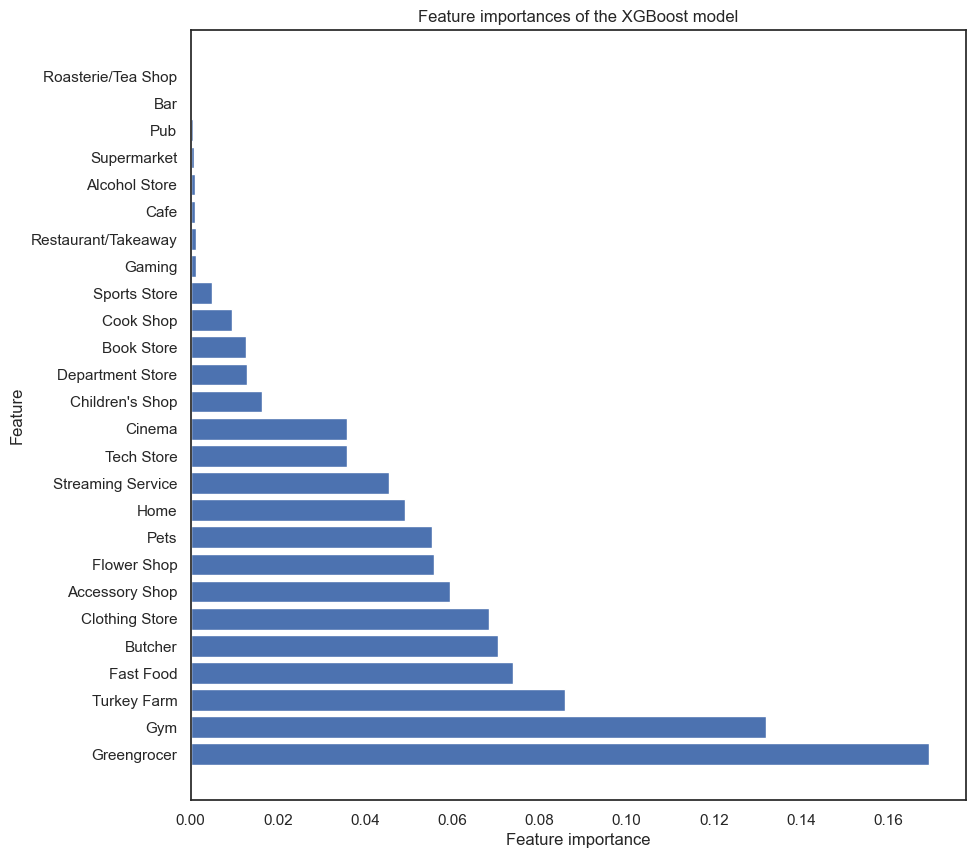

In [329]:
# inline plotting
%matplotlib inline

# visualise feature importances
importances = best_xgb.feature_importances_

# create dataframe of feature importances
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['importance'])

# sort dataframe by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# plot feature importances
plt.figure(figsize=(10, 10))
plt.barh(feature_importances.index, feature_importances['importance'])
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.title('Feature importances of the XGBoost model')
plt.show()

- Feature importance in XGBoost models provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions in decision trees, the higher its relative importance.

    - This importance is calculated explicitly for each attribute in the dataset, allowing attributes to be ranked and compared to each other.

    - Importance is calculated for a single decision tree by the amount that each attribute split point improves the performance measure, weighted by the number of observations the node is responsible for. The performance measure may be the purity (Gini index) used to select the split points or another more specific error function.

    - The feature importances are then averaged across all of the decision trees within the model. This gives you a score for each feature in your dataset, where higher scores indicate more important features.

- Can see most common/shared categories amongst individuals - supermarkets, cafes, pub, restaurant - least differentiating.

In [330]:
"""# plot tree
import matplotlib.pyplot as plt
import graphviz

# plot tree
plt.figure(figsize=(20, 20))
xgb.plot_tree(best_xgb, num_trees=0)
plt.show()"""

'# plot tree\nimport matplotlib.pyplot as plt\nimport graphviz\n\n# plot tree\nplt.figure(figsize=(20, 20))\nxgb.plot_tree(best_xgb, num_trees=0)\nplt.show()'

#### Logitistic Regression

In [331]:
""" # import logistic regression
from sklearn.linear_model import LogisticRegression

# create logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# grid search for best parameters for logistic regression
from sklearn.model_selection import GridSearchCV

# create parameter grid
param_grid = {
    'C': np.logspace(-10, 10, 30),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
# create GridSearchCV object
grid_search_log_reg = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)

# fit GridSearchCV object
grid_search_log_reg.fit(X_train, y_train)

# print best parameters
print(grid_search_log_reg.best_params_) """


" # import logistic regression\nfrom sklearn.linear_model import LogisticRegression\n\n# create logistic regression model\nlog_reg = LogisticRegression(max_iter=1000)\n\n# grid search for best parameters for logistic regression\nfrom sklearn.model_selection import GridSearchCV\n\n# create parameter grid\nparam_grid = {\n    'C': np.logspace(-10, 10, 30),\n    'penalty': ['l1', 'l2'],\n    'solver': ['liblinear']\n}\n# create GridSearchCV object\ngrid_search_log_reg = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)\n\n# fit GridSearchCV object\ngrid_search_log_reg.fit(X_train, y_train)\n\n# print best parameters\nprint(grid_search_log_reg.best_params_) "

Fitting 10 folds for each of 60 candidates, totalling 600 fits
{'C': 85316785.24172848, 'penalty': 'l1', 'solver': 'liblinear'}

In [332]:
""" # get best estimator
best_log_reg = grid_search_log_reg.best_estimator_

# test best estimator
y_pred = best_log_reg.predict(X_test)

# get classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
 """

' # get best estimator\nbest_log_reg = grid_search_log_reg.best_estimator_\n\n# test best estimator\ny_pred = best_log_reg.predict(X_test)\n\n# get classification report\nfrom sklearn.metrics import classification_report\nprint(classification_report(y_test, y_pred))\n '